Pair trading strategy

Import and cleanning of the data 

In [1]:
%run packages.py

/Users/mcbookairdebat/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
import numpy as np 

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf 

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)

In [5]:
Stock_list = pd.DataFrame(tables[0])

In [6]:
Stock_list.drop(['Security','GICS Sub-Industry','Headquarters Location','CIK','Founded'],axis = 1, inplace=True)

In [7]:
Stock_list['Date added'] = pd.to_datetime(Stock_list['Date added'])


In [8]:
stock_lists = Stock_list[( Stock_list['Date added'] < '2019-12-31') & (Stock_list['Date added']>'2015-01-01')][['Symbol','GICS Sector']]
print(list(stock_lists['Symbol']))

['AOS', 'AMD', 'ALB', 'ARE', 'ALGN', 'LNT', 'AMCR', 'AWK', 'ANSS', 'ANET', 'AJG', 'ATO', 'BKR', 'BR', 'CDNS', 'CBOE', 'CDW', 'CE', 'CNC', 'CHTR', 'CHD', 'CFG', 'COO', 'CPRT', 'CPAY', 'CTVA', 'FANG', 'DLR', 'D', 'DOW', 'DD', 'EQIX', 'EG', 'EVRG', 'EXR', 'FRT', 'FTNT', 'FTV', 'FOXA', 'FOX', 'IT', 'GPN', 'HCA', 'HSIC', 'HPE', 'HLT', 'HOLX', 'HWM', 'HII', 'IEX', 'IDXX', 'INCY', 'IQV', 'JBHT', 'JKHY', 'KEYS', 'KHC', 'LW', 'LVS', 'LDOS', 'LYV', 'LKQ', 'MKTX', 'MTD', 'MGM', 'MAA', 'MSCI', 'NWS', 'NCLH', 'NVR', 'ODFL', 'PKG', 'PYPL', 'QRVO', 'RJF', 'O', 'REG', 'RMD', 'ROL', 'SBAC', 'SRE', 'NOW', 'SWKS', 'STE', 'SYF', 'SNPS', 'TMUS', 'TROW', 'TTWO', 'TFX', 'TDG', 'UDR', 'ULTA', 'UAL', 'VRSK', 'WRB', 'WAB', 'WTW', 'ZBRA']


In [9]:

data_list = [yf.download(stock,start='2018-01-01',end='2019-12-31',period='1d')['Close'] for stock in stock_lists['Symbol']]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
data_list

[Ticker            AOS
 Date                 
 2018-01-02  61.529999
 2018-01-03  61.900002
 2018-01-04  62.189999
 2018-01-05  62.990002
 2018-01-08  63.290001
 ...               ...
 2019-12-23  47.139999
 2019-12-24  47.500000
 2019-12-26  47.740002
 2019-12-27  47.810001
 2019-12-30  47.570000
 
 [502 rows x 1 columns],
 Ticker            AMD
 Date                 
 2018-01-02  10.980000
 2018-01-03  11.550000
 2018-01-04  12.120000
 2018-01-05  11.880000
 2018-01-08  12.280000
 ...               ...
 2019-12-23  45.459999
 2019-12-24  46.540001
 2019-12-26  46.630001
 2019-12-27  46.180000
 2019-12-30  45.520000
 
 [502 rows x 1 columns],
 Ticker             ALB
 Date                  
 2018-01-02  131.529999
 2018-01-03  131.789993
 2018-01-04  130.220001
 2018-01-05  131.720001
 2018-01-08  137.449997
 ...                ...
 2019-12-23   72.430000
 2019-12-24   72.320000
 2019-12-26   72.489998
 2019-12-27   72.010002
 2019-12-30   71.930000
 
 [502 rows x 1 columns],
 Ticker  

In [11]:
data = pd.DataFrame(data_list[0])
for z in data_list[1:]:
    z= pd.DataFrame(z)
    stock_name = z.columns[0]
    data[stock_name] = z[stock_name]
data

Ticker            AOS        AMD         ALB         ARE        ALGN  \
Date                                                                   
2018-01-02  61.529999  10.980000  131.529999  129.929993  224.619995   
2018-01-03  61.900002  11.550000  131.789993  129.320007  231.199997   
2018-01-04  62.189999  12.120000  130.220001  126.739998  233.300003   
2018-01-05  62.990002  11.880000  131.720001  127.000000  241.070007   
2018-01-08  63.290001  12.280000  137.449997  127.279999  248.899994   
...               ...        ...         ...         ...         ...   
2019-12-23  47.139999  45.459999   72.430000  159.210007  278.140015   
2019-12-24  47.500000  46.540001   72.320000  160.100006  277.890015   
2019-12-26  47.740002  46.630001   72.489998  160.029999  278.260010   
2019-12-27  47.810001  46.180000   72.010002  160.399994  277.640015   
2019-12-30  47.570000  45.520000   71.930000  159.669998  275.630005   

Ticker            LNT   AMCR         AWK        ANSS       ANET  ...  \
Date                                                             ...   
2018-01-02  42.110001  11.80   89.080002  148.550003  57.757500  ...   
2018-01-03  41.740002  11.80   88.449997  151.419998  58.900002  ...   
2018-01-04  41.250000  11.80   87.610001  151.820007  58.172501  ...   
2018-01-05  41.080002  11.80   86.750000  152.449997  59.192501  ...   
2018-01-08  41.540001  11.80   87.500000  153.710007  62.764999  ...   
...               ...    ...         ...         ...        ...  ...   
2019-12-23  54.299999  10.91  121.389999  255.729996  51.217499  ...   
2019-12-24  54.270000  10.79  121.620003  256.489990  51.160000  ...   
2019-12-26  54.220001  10.85  121.879997  258.329987  51.402500  ...   
2019-12-27  54.340000  10.95  122.959999  258.679993  51.107498  ...   
2019-12-30  54.380001  10.85  123.050003  256.799988  50.782501  ...   

Ticker             TFX         TDG        UDR        ULTA        UAL  \
Date                                                                   
2018-01-02  254.729996  275.109985  38.060001  229.630005  68.940002   
2018-01-03  256.640015  270.220001  38.340000  245.119995  68.489998   
2018-01-04  254.009995  272.839996  37.560001  244.880005  69.260002   
2018-01-05  257.730011  274.910004  37.509998  237.960007  69.360001   
2018-01-08  258.679993  276.019989  37.610001  231.139999  68.510002   
...                ...         ...        ...         ...        ...   
2019-12-23  374.309998  593.030029  45.860001  253.020004  89.440002   
2019-12-24  373.980011  592.630005  46.049999  252.490005  89.150002   
2019-12-26  372.769989  597.780029  46.200001  251.330002  89.260002   
2019-12-27  371.980011  563.979980  46.340000  253.169998  88.370003   
2019-12-30  371.390015  562.010010  46.330002  251.350006  87.959999   

Ticker            VRSK        WRB        WAB         WTW        ZBRA  
Date                                                                  
2018-01-02   95.830002  20.752592  82.930000  146.990005  103.709999  
2018-01-03   95.550003  20.580742  82.260002  149.740005  105.769997  
2018-01-04   96.029999  20.663704  83.370003  151.259995  107.860001  
2018-01-05   96.879997  20.577778  81.830002  152.229996  109.540001  
2018-01-08   97.000000  20.474073  82.370003  151.410004  110.629997  
...                ...        ...        ...         ...         ...  
2019-12-23  149.550003  30.400000  77.860001  201.580002  256.730011  
2019-12-24  149.169998  30.408890  77.629997  201.990005  254.330002  
2019-12-26  148.830002  30.431110  78.180000  202.020004  254.419998  
2019-12-27  148.580002  30.475555  78.550003  201.759995  256.000000  
2019-12-30  147.550003  30.502222  77.599998  201.580002  254.110001  

[502 rows x 99 columns]

In [12]:
# We have to normalize the price 
value = data.agg(['min','max'])

data_norm = (data - value.loc['min']) / (value.loc['max'] - value.loc['min'])

data_norm.fillna(method = 'ffill',inplace = True)

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/1968723522.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_norm.fillna(method = 'ffill',inplace = True)


In [13]:
# We have to compute the 'euclidian distance' between the prices to find the best pairs.
distances = np.zeros((data_norm.shape[1],data_norm.shape[1]))
for col in data_norm.columns:
    for col2 in data_norm.columns:
        distances[data_norm.columns.get_loc(col)][data_norm.columns.get_loc(col2)] = np.sqrt(((data_norm[col] - data_norm[col2])**2).sum())
distances = pd.DataFrame(distances, columns=data_norm.columns, index = data_norm.columns)

In [14]:
distances

Ticker        AOS        AMD        ALB        ARE       ALGN        LNT  \
Ticker                                                                     
AOS      0.000000  10.731752   5.146275  10.207220   6.546741  11.155465   
AMD     10.731752   0.000000   9.239406   3.933861   8.269145   3.607006   
ALB      5.146275   9.239406   0.000000  10.081380   6.590131  10.477641   
ARE     10.207220   3.933861  10.081380   0.000000   9.039399   2.283199   
ALGN     6.546741   8.269145   6.590131   9.039399   0.000000   9.681635   
...           ...        ...        ...        ...        ...        ...   
VRSK    11.276352   3.568868  10.583267   2.796110   9.564954   1.933429   
WRB     12.021680   4.013814  11.377461   3.095973  10.668593   2.713737   
WAB      6.131183   9.041871   4.906160  10.215537   4.552732  10.420977   
WTW     10.539857   4.530344  10.304603   2.445382   9.799047   2.965586   
ZBRA    10.178650   3.426134   9.702193   3.124915   8.449215   3.040099   

Ticker      AMCR        AWK      ANSS      ANET  ...        TFX        TDG  \
Ticker                                           ...                         
AOS     6.627726  11.849198  9.575594  5.688752  ...  10.412430  11.115366   
AMD     8.946464   3.659786  2.847292  8.517885  ...   4.002219   2.855878   
ALB     7.756914  10.982331  8.980131  6.086127  ...   9.958134  10.455820   
ARE     7.722932   2.603895  2.999331  8.265872  ...   2.860418   2.313858   
ALGN    7.124819  10.366258  8.190812  5.865078  ...   9.653489   9.475546   
...          ...        ...       ...       ...  ...        ...        ...   
VRSK    8.679451   1.847135  3.840051  8.523511  ...   3.308606   2.219787   
WRB     9.692897   1.941743  3.576629  9.845385  ...   2.839883   2.249102   
WAB     9.090393  11.224617  8.817029  6.971481  ...  10.314203  10.414912   
WTW     7.527038   2.740233  3.682201  8.288581  ...   2.288399   2.685835   
ZBRA    8.103934   3.795157  3.802610  7.837179  ...   4.139512   2.916869   

Ticker        UDR       ULTA        UAL       VRSK        WRB        WAB  \
Ticker                                                                     
AOS     11.563784  10.816537  11.419662  11.276352  12.021680   6.131183   
AMD      4.201022   6.282641   5.475274   3.568868   4.013814   9.041871   
ALB     10.918717   9.340489  10.434940  10.583267  11.377461   4.906160   
ARE      3.044499   6.932692   5.962091   2.796110   3.095973  10.215537   
ALGN     9.901908   8.394015   9.145150   9.564954  10.668593   4.552732   
...           ...        ...        ...        ...        ...        ...   
VRSK     2.383614   5.960088   5.061205   0.000000   2.313766  10.482976   
WRB      3.792554   7.505230   6.744845   2.313766   0.000000  11.362490   
WAB     10.958568   9.921337   9.922950  10.482976  11.362490   0.000000   
WTW      3.562019   6.540757   6.202320   2.837815   3.137196  10.835642   
ZBRA     3.001413   5.929112   4.393790   3.337553   4.533461   9.519302   

Ticker        WTW       ZBRA  
Ticker                        
AOS     10.539857  10.178650  
AMD      4.530344   3.426134  
ALB     10.304603   9.702193  
ARE      2.445382   3.124915  
ALGN     9.799047   8.449215  
...           ...        ...  
VRSK     2.837815   3.337553  
WRB      3.137196   4.533461  
WAB     10.835642   9.519302  
WTW      0.000000   3.743621  
ZBRA     3.743621   0.000000  

[99 rows x 99 columns]

In [15]:
import seaborn as sns 

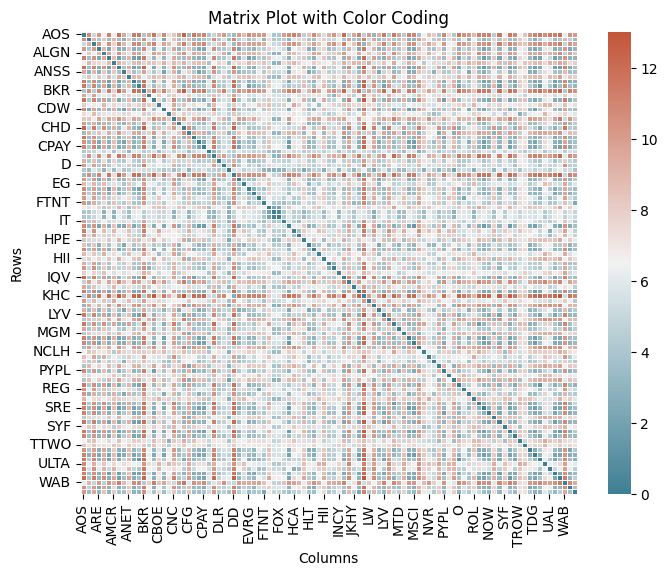

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(distances, cmap=cmap, annot=False, fmt=".1f", linewidths=.5)

# Add titles and labels
plt.title('Matrix Plot with Color Coding')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

In [17]:
# So as we can see, it is a bit confusing.
# So we are going to go sector neutral by diving our universe with the Gics sector
liste_sector = stock_lists['GICS Sector'].unique()
liste_by_sector = {i:stock_lists[stock_lists['GICS Sector']==i]['Symbol'] for i in liste_sector}

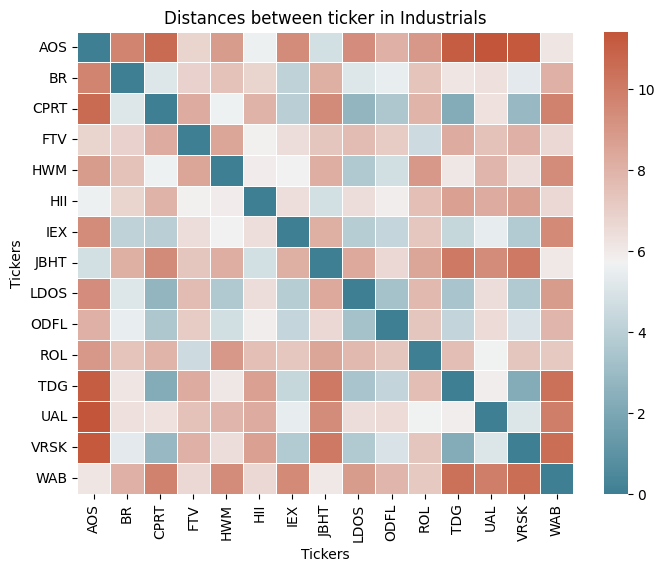

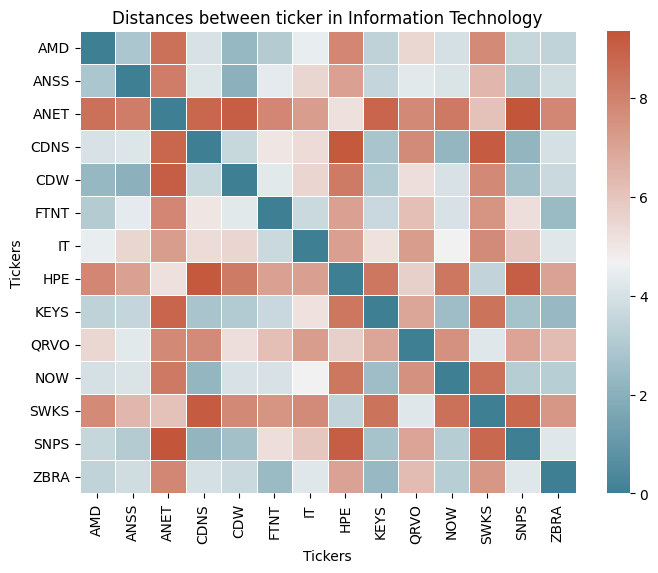

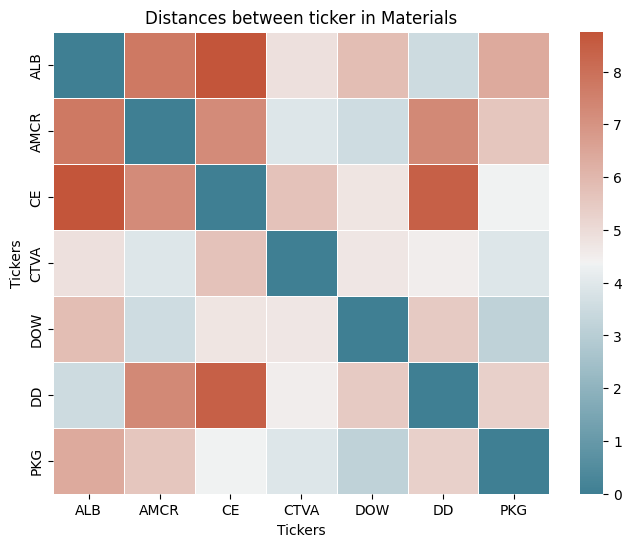

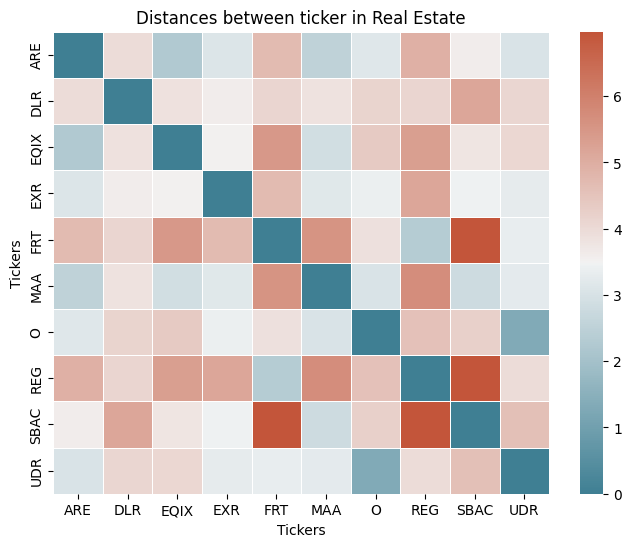

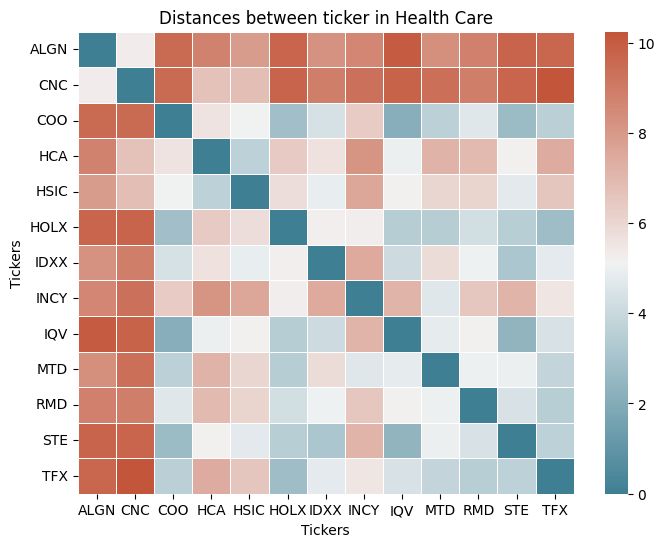

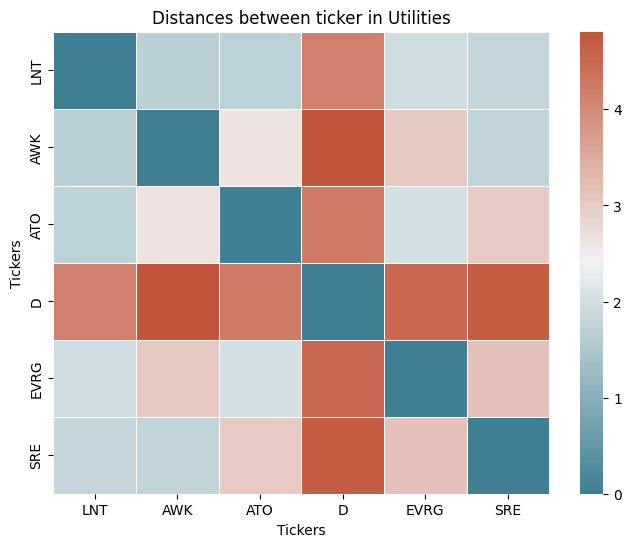

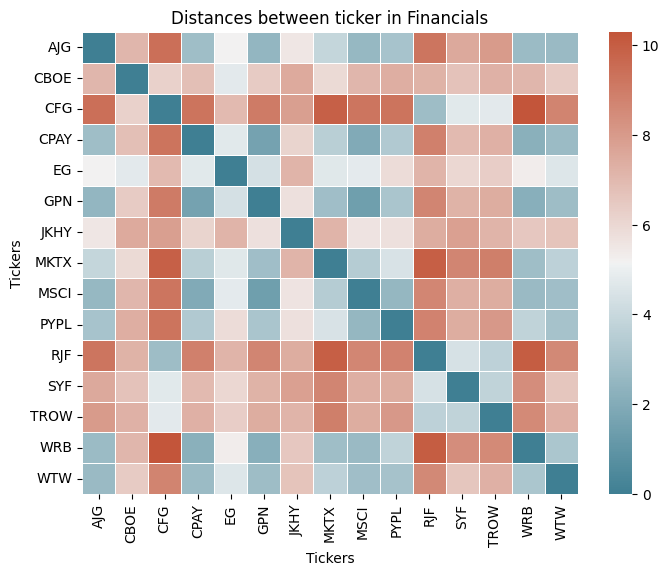

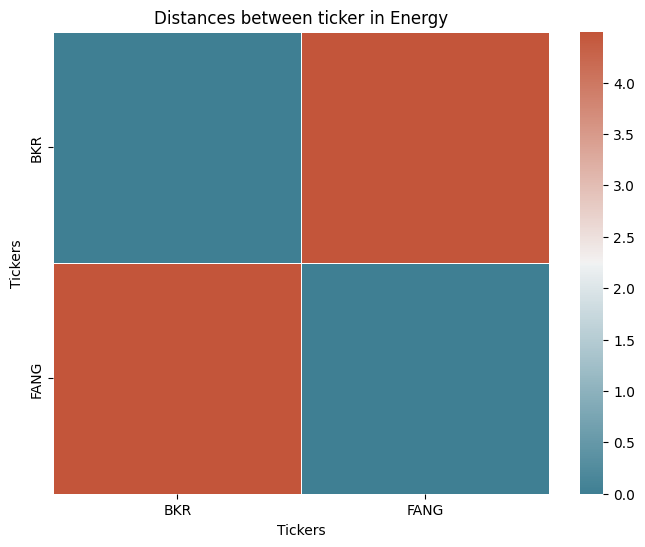

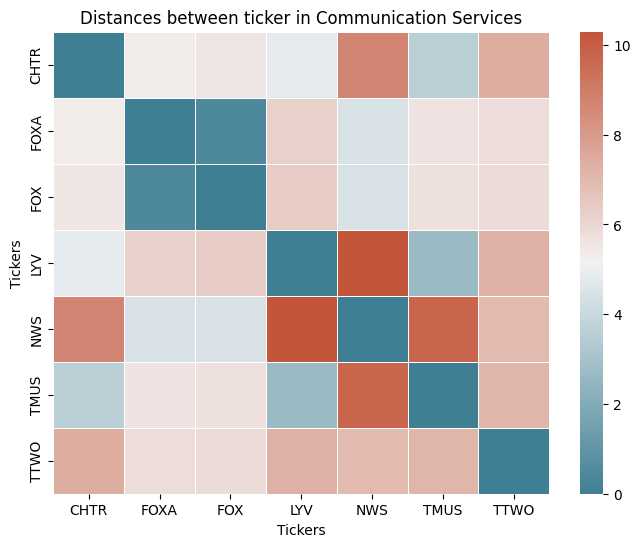

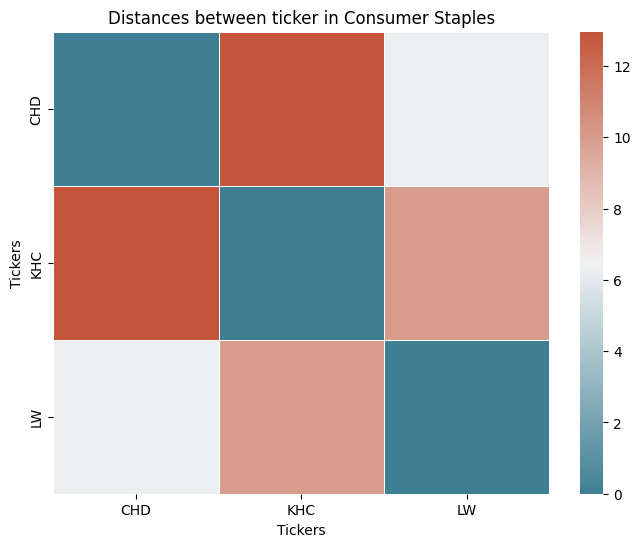

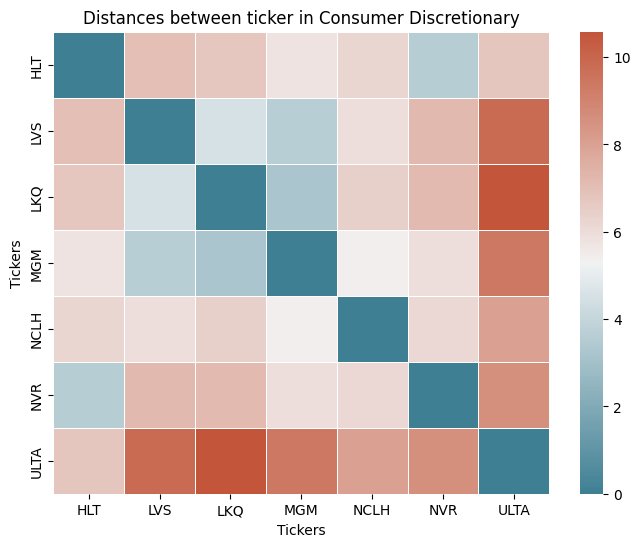

In [18]:
for sector in liste_sector:
    l = liste_by_sector[sector]
    distances1 = distances.loc[l][l]
    plt.figure(figsize=(8, 6))

# Generate a custom colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
    sns.heatmap(distances1, cmap=cmap, annot=False, fmt=".1f", linewidths=.5)

# Add titles and labels
    plt.title(f'Distances between ticker in ' + sector)
    plt.xlabel('Tickers')
    plt.ylabel('Tickers')

# Show the plot
plt.show()

In [19]:
# Here we are going to set some threshold for the rest of the analysis, 
# We set that we have to take at least one pair by sector to be market neutral 
# We are then going to find the 9 smallest pair to get 20 paris

In [20]:
pairs = {k:[tuple(sorted((i,j))) for i in liste_by_sector[k] for j in liste_by_sector[k] if j!=i] for k in liste_sector}
pairs_without_duplicates = {k :sorted(list(set(pairs[k]))) for k in liste_sector}

In [21]:
nb_sector = 2
selected_pairs ={}
for sector in liste_sector:
    l = liste_by_sector[sector]
    distances1 = distances.loc[l][l]
    np.fill_diagonal(distances1.values, 1000)
    minimum_values = np.unique((np.array(distances1).reshape(-1,1)))
    if len(minimum_values) > 2:
        minimum_values = minimum_values[nb_sector:nb_sector+1]
        distances1 = distances1[distances1<minimum_values[0]]
        pair_list = list(distances1[distances1.notna()].stack().index)
        pair_list = [tuple(sorted(pair)) for pair in pair_list]
        selected_pairs[sector] = [values for values in pairs_without_duplicates[sector] if values in pair_list]
    else:
        selected_pairs[sector] = pairs_without_duplicates[sector]

selected_pairs

{'Industrials': [('CPRT', 'TDG'), ('TDG', 'VRSK')],
 'Information Technology': [('ANSS', 'CDW'), ('CDNS', 'SNPS')],
 'Materials': [('ALB', 'DD'), ('DOW', 'PKG')],
 'Real Estate': [('ARE', 'EQIX'), ('O', 'UDR')],
 'Health Care': [('COO', 'IQV'), ('IQV', 'STE')],
 'Utilities': [('ATO', 'LNT'), ('AWK', 'LNT')],
 'Financials': [('CPAY', 'GPN'), ('GPN', 'MSCI')],
 'Energy': [('BKR', 'FANG')],
 'Communication Services': [('FOX', 'FOXA'), ('LYV', 'TMUS')],
 'Consumer Staples': [('CHD', 'LW'), ('KHC', 'LW')],
 'Consumer Discretionary': [('HLT', 'NVR'), ('LKQ', 'MGM')]}

In [22]:
# Now that we have selected our pairs we gonna reduce our initial dataframe to the only couple that we have 
# We have to create a list from the couples and then reduce the dataframe to this
data1 = data_norm.copy()
data2 = data.copy()
# The goal would be to stock every small data frame in a dictionnay to help doing the steps for the reste 
dataframes_dictionnary_norm = {}
dataframes_dictionnary_raw ={}
for sector in liste_sector: 
    for value in selected_pairs[sector]:
        dataframes_dictionnary_norm[value] = data1[list(value)]
        dataframes_dictionnary_raw[value] = data2[list(value)]


In [23]:
# There is two approach that we can use for this, the first one would be to be dollar neutral which mean that the spread is simply the difference between the two stocks 
# The second way to do it is by computing S_a = beta * S_b + alpha 

<Figure size 1500x2000 with 0 Axes>

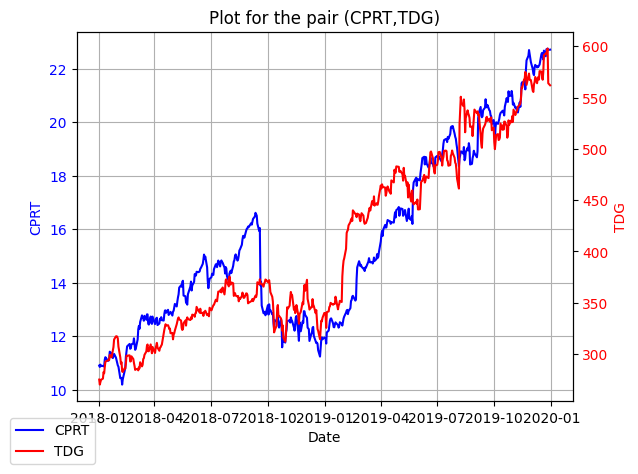

<Figure size 1500x2000 with 0 Axes>

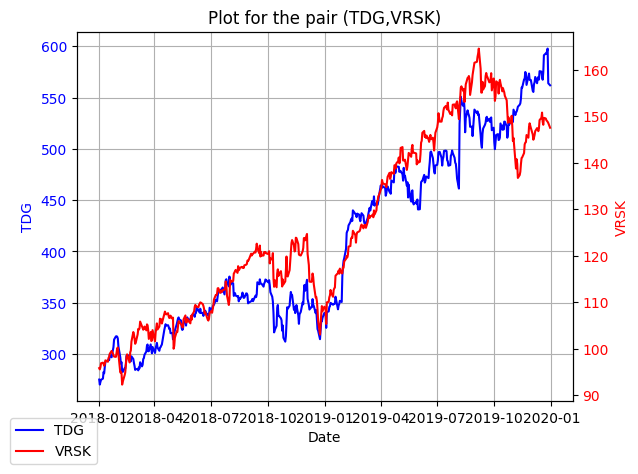

<Figure size 1500x2000 with 0 Axes>

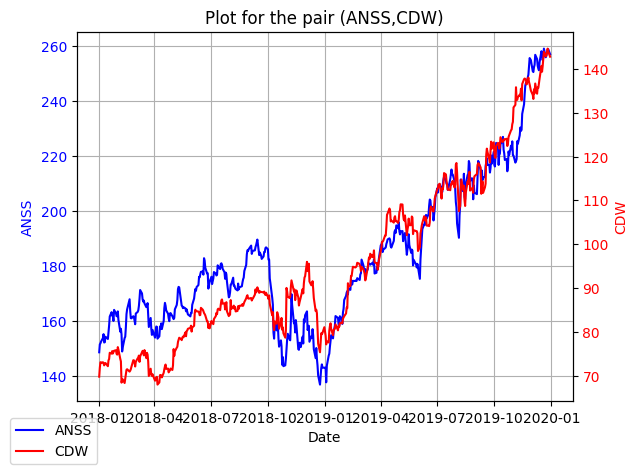

<Figure size 1500x2000 with 0 Axes>

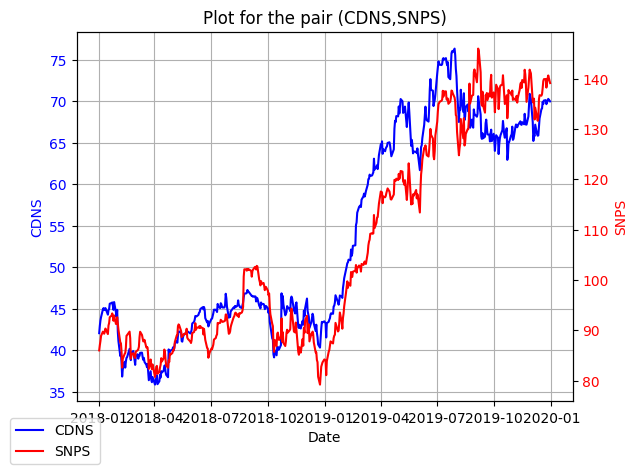

<Figure size 1500x2000 with 0 Axes>

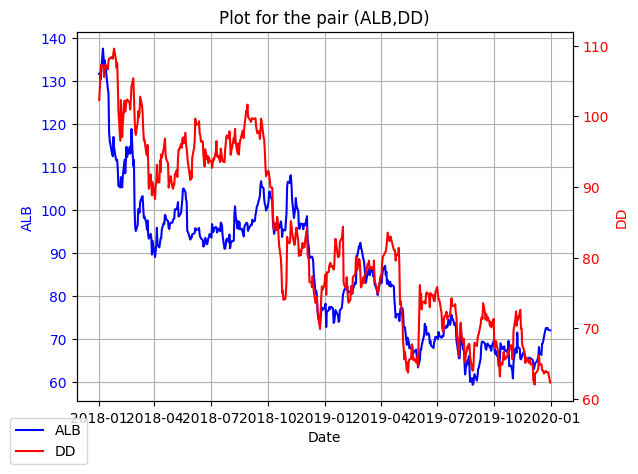

<Figure size 1500x2000 with 0 Axes>

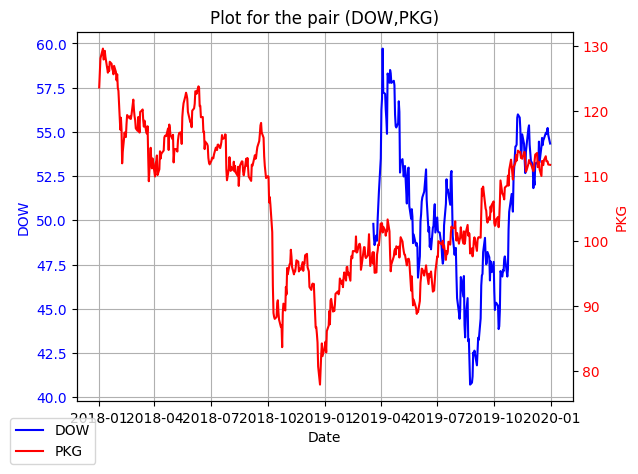

<Figure size 1500x2000 with 0 Axes>

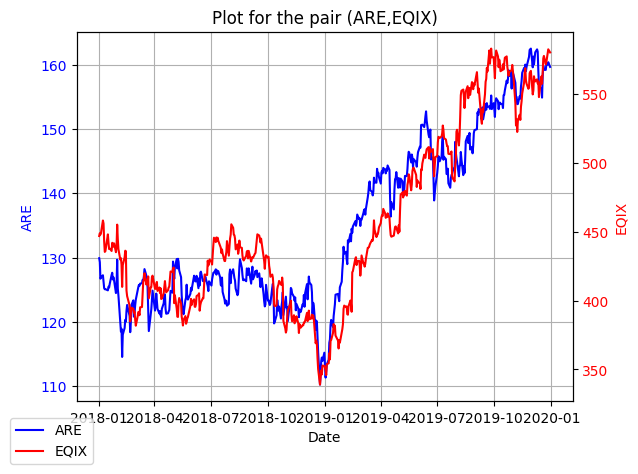

<Figure size 1500x2000 with 0 Axes>

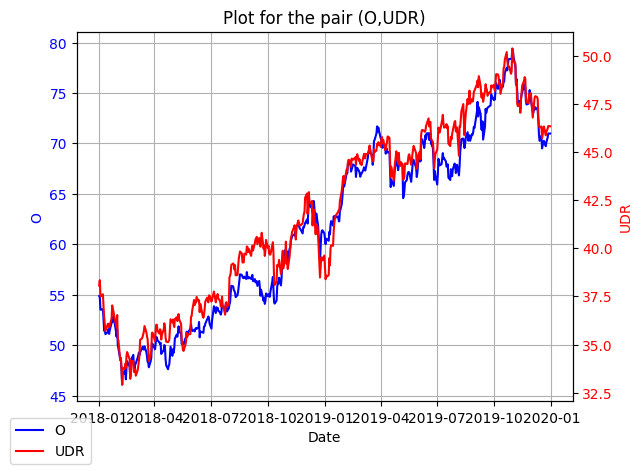

<Figure size 1500x2000 with 0 Axes>

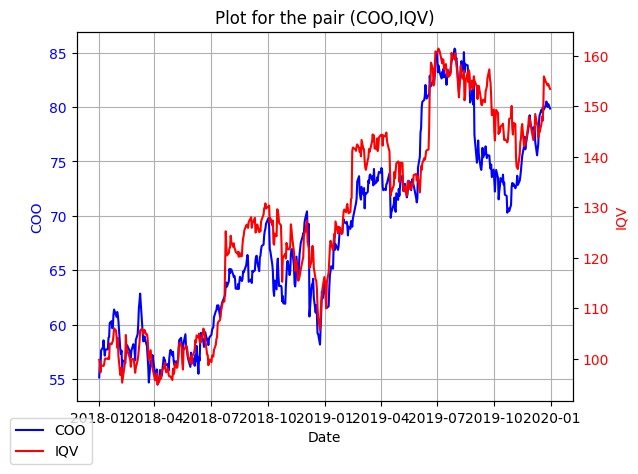

<Figure size 1500x2000 with 0 Axes>

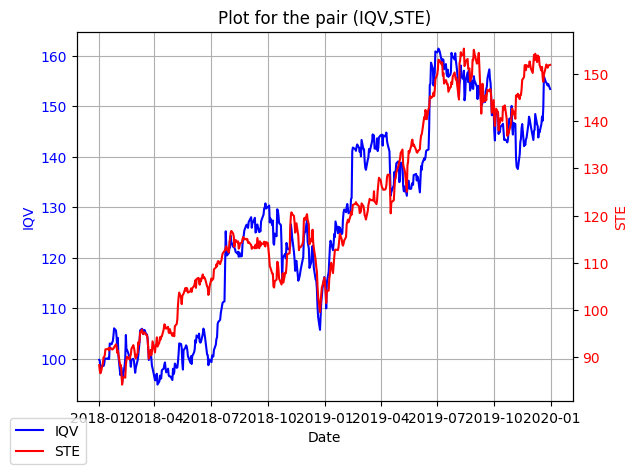

<Figure size 1500x2000 with 0 Axes>

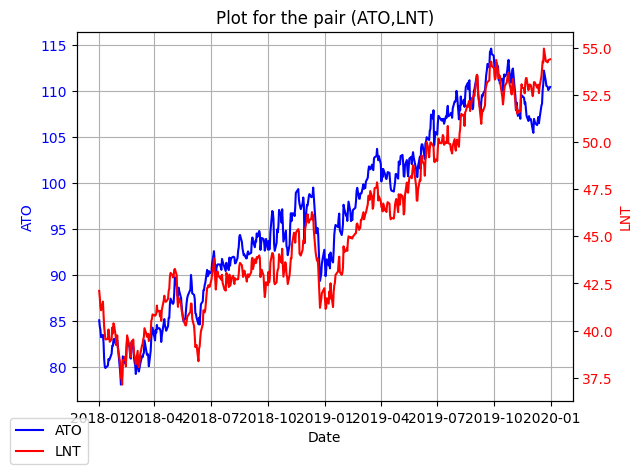

<Figure size 1500x2000 with 0 Axes>

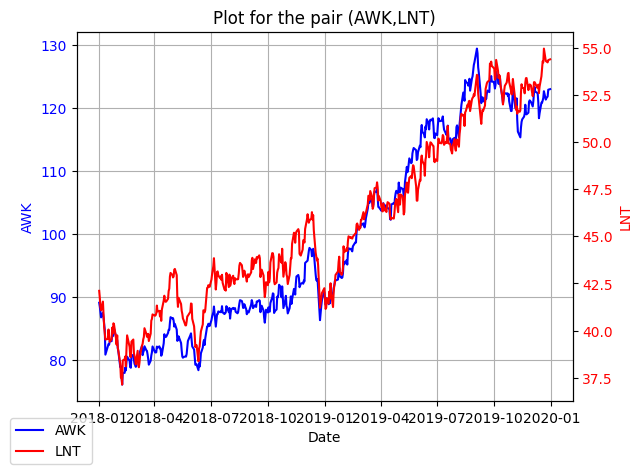

<Figure size 1500x2000 with 0 Axes>

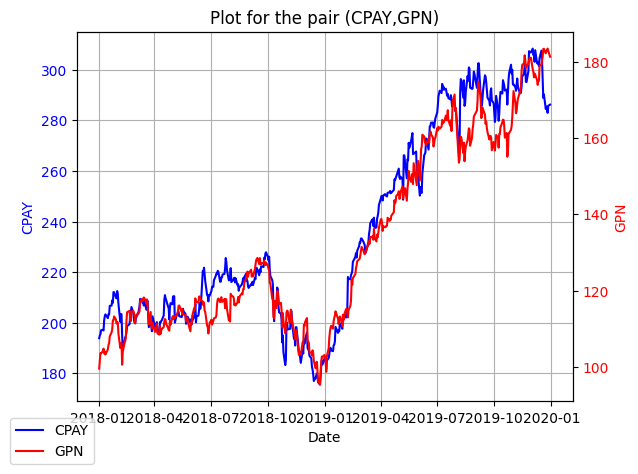

<Figure size 1500x2000 with 0 Axes>

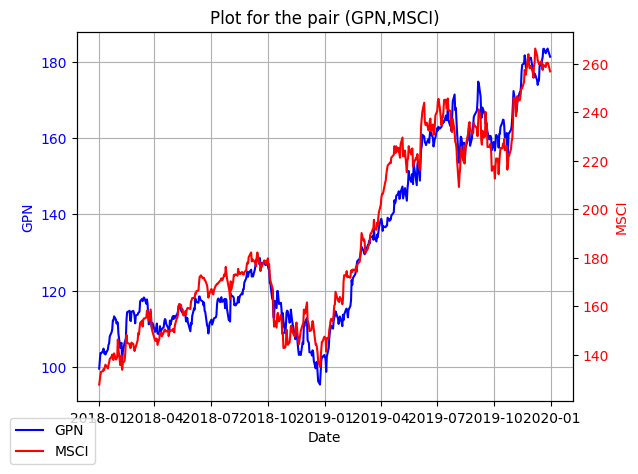

<Figure size 1500x2000 with 0 Axes>

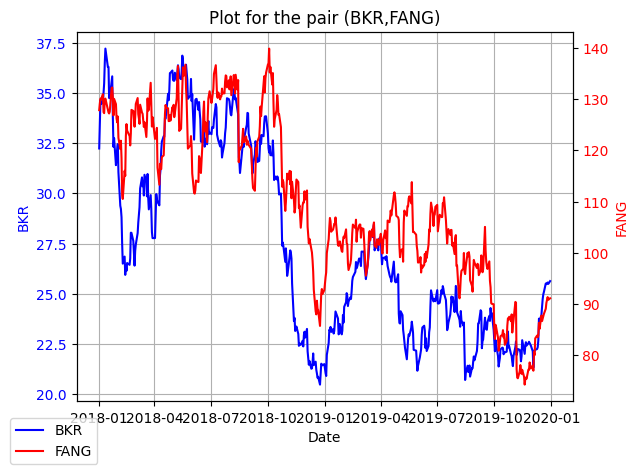

<Figure size 1500x2000 with 0 Axes>

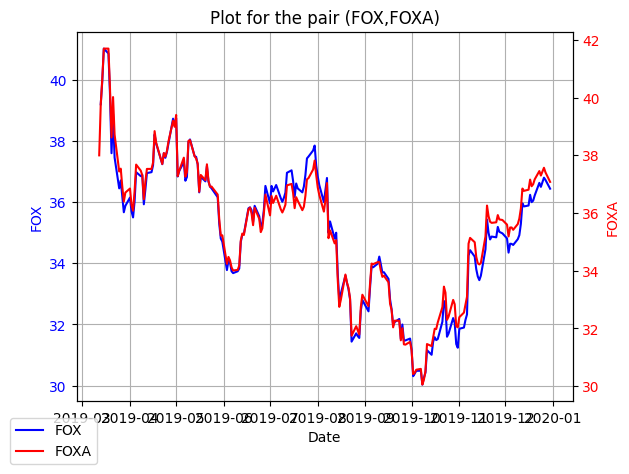

<Figure size 1500x2000 with 0 Axes>

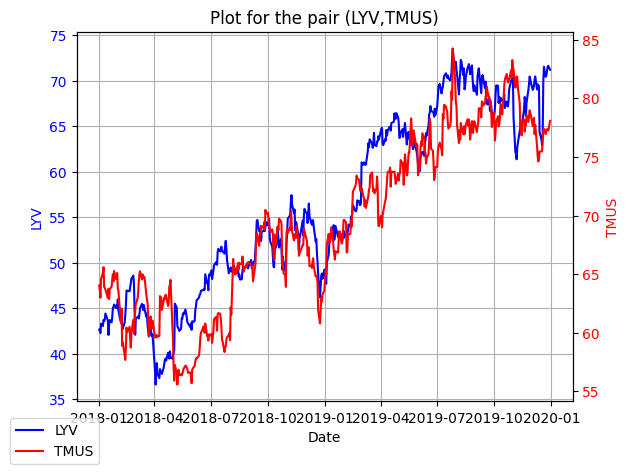

<Figure size 1500x2000 with 0 Axes>

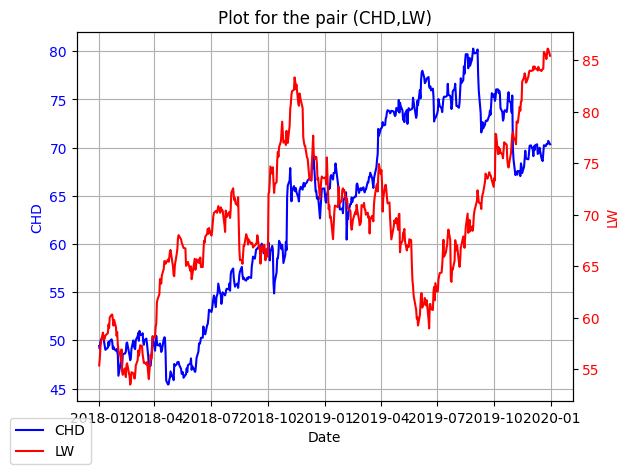

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

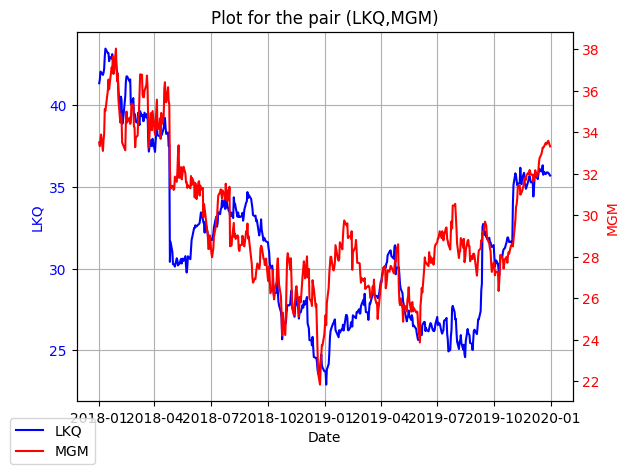

In [24]:
# It is time to see a little bit of plotting for each pairs just to have a feeling of what we can do next 
for key in dataframes_dictionnary_raw:
    plt.figure(figsize=(15, 20))
    x = dataframes_dictionnary_raw[key].index
    y1 = dataframes_dictionnary_raw[key][key[0]]
    y2 = dataframes_dictionnary_raw[key][key[1]]
    fig, ax1 = plt.subplots()

# Plot on the first y-axis
    ax1.plot(x, y1, 'b-', label=f'{key[0]}')
    ax1.set_xlabel('Date')  # Common x-axis label
    ax1.set_ylabel(f'{key[0]}', color='b')  # First y-axis label
    ax1.tick_params(axis='y', labelcolor='b')  # Match tick labels with axis color

# Create the second y-axis
    ax2 = ax1.twinx()  # This shares the same x-axis
    ax2.plot(x, y2, 'r-', label=f'{key[1]}')
    ax2.set_ylabel(f'{key[1]}', color='r')  # Second y-axis label
    ax2.tick_params(axis='y', labelcolor='r')  # Match tick labels with axis color

# Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.01, 0.09))

# Add a grid (optional)
    ax1.grid(True)

# Show the plot
    plt.title(f"Plot for the pair ({key[0]},{key[1]})")
    plt.show()



In [59]:
# We are going to compute the Normalizing pair divergence 
# Delta_norm = (Delta - MA_10d) / std_10days 

for key,values in dataframes_dictionnary_raw.items():
    values['Delta'] = np.abs(values[key[0]] - values[key[1]])
    values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
    values.drop(['Delta'], axis = 1, inplace=True )

dataframes_dictionnary_raw


/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/3551630156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta'] = np.abs(values[key[0]] - values[key[1]])
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/3551630156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['Delta_norm'] = (values['Delta'] - values['Delta'].rolling(10).mean()) / values['Delta'].rolling(10).std()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/3551630156.py:7: Se

{('CPRT',
  'TDG'): Ticker           CPRT         TDG  Delta_norm      mean  upper_bond  \
 Date                                                                  
 2018-01-02  10.900000  275.109985         NaN  1.057022    3.029244   
 2018-01-03  10.847500  270.220001         NaN  1.057022    3.029244   
 2018-01-04  10.935000  272.839996         NaN  1.057022    3.029244   
 2018-01-05  10.882500  274.910004         NaN  1.057022    3.029244   
 2018-01-08  10.887500  276.019989         NaN  1.057022    3.029244   
 ...               ...         ...         ...       ...         ...   
 2019-12-23  22.467501  593.030029    1.893304  1.057022    3.029244   
 2019-12-24  22.727501  592.630005    1.406051  1.057022    3.029244   
 2019-12-26  22.754999  597.780029    1.457314  1.057022    3.029244   
 2019-12-27  22.705000  563.979980   -1.351469  1.057022    3.029244   
 2019-12-30  22.715000  562.010010   -1.260483  1.057022    3.029244   
 
 Ticker      lower_bond    a    b  entry_po

In [60]:
pairs_mean_and_std_values ={key:dataframes_dictionnary_raw[key]['Delta_norm'].agg(['mean','std']) for key in dataframes_dictionnary_raw.keys() }


In [61]:
exemple = dataframes_dictionnary_raw[('CPRT',
  'TDG')]

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

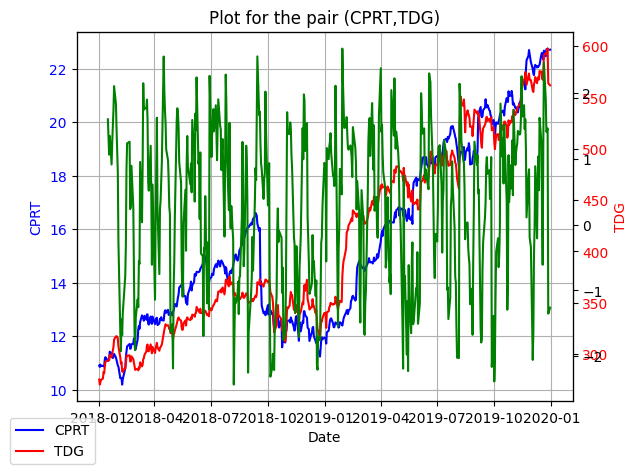

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

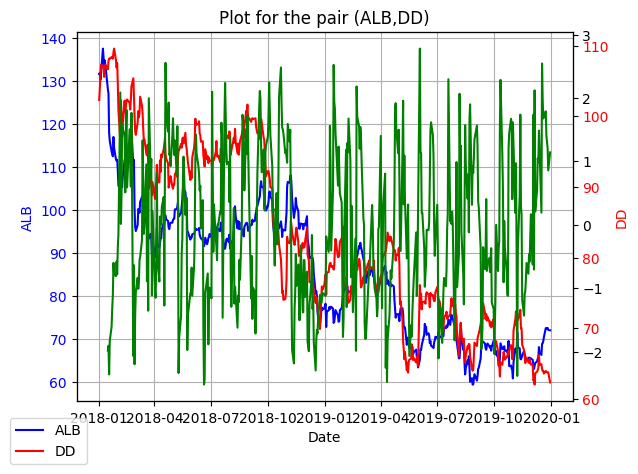

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

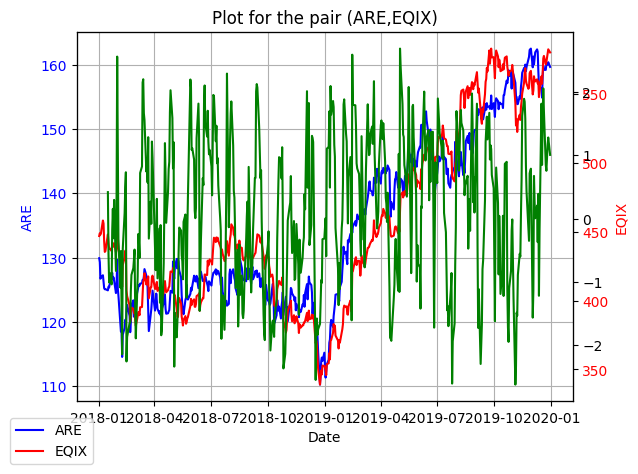

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

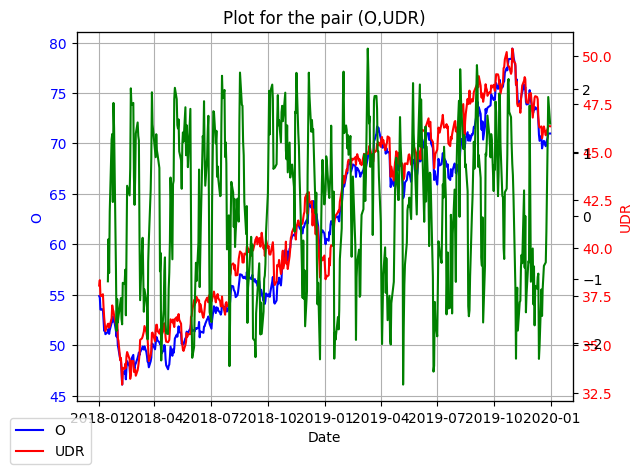

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

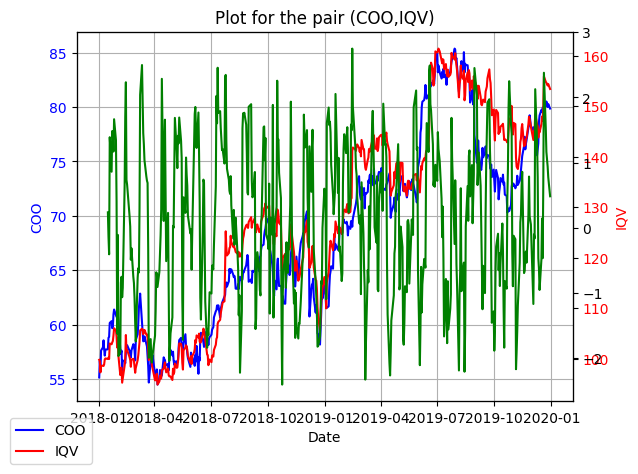

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

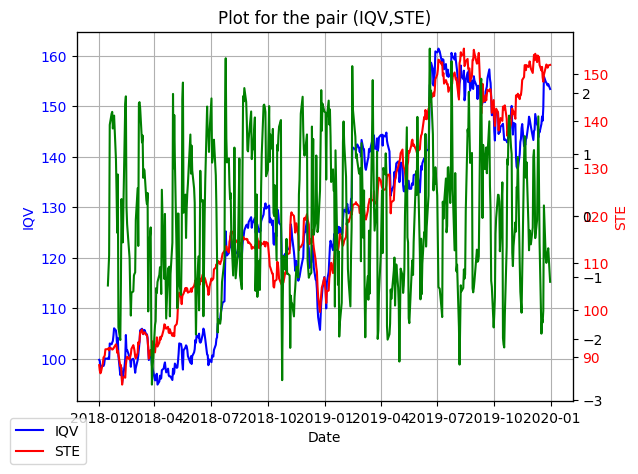

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

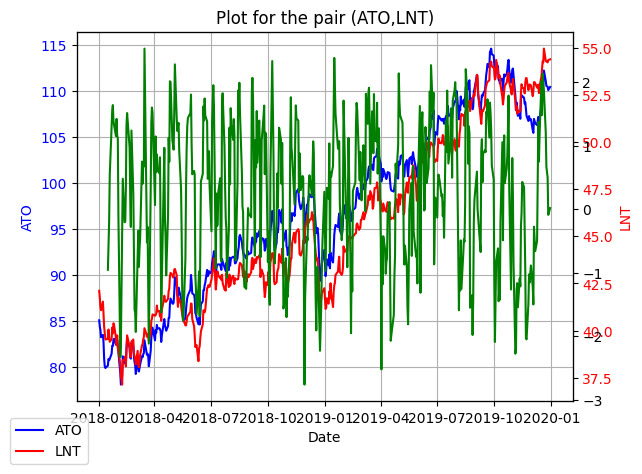

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

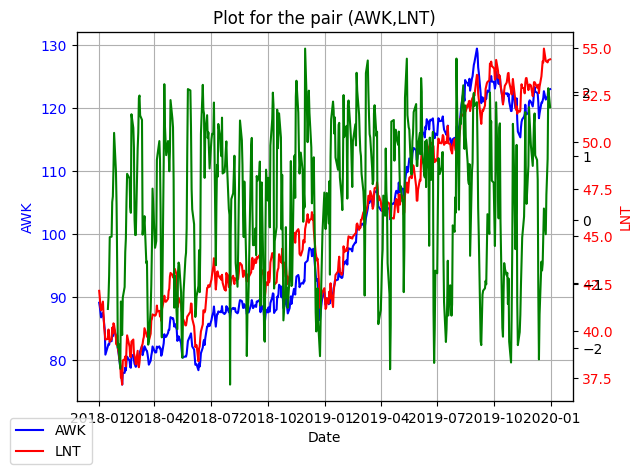

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

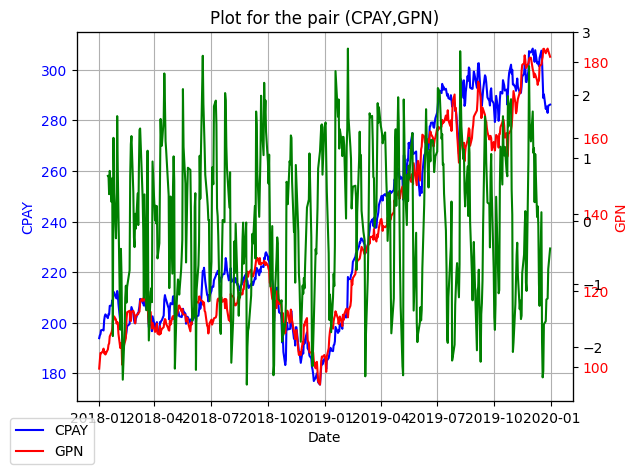

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

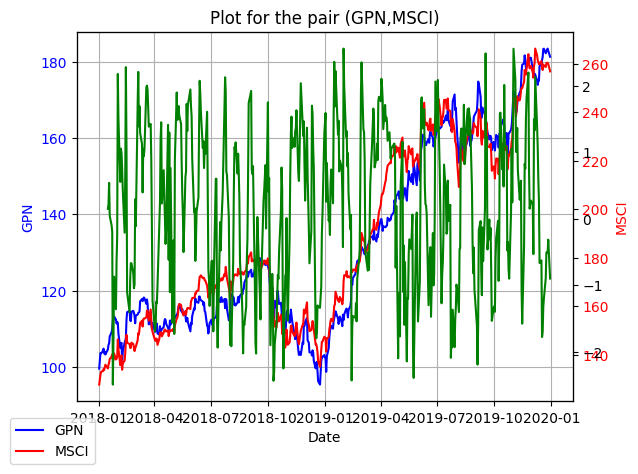

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

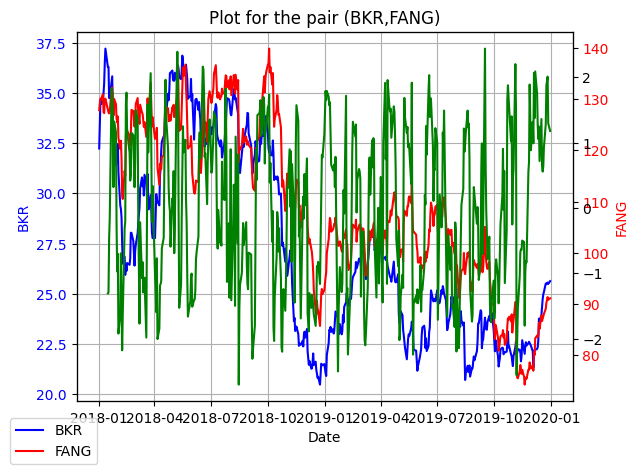

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

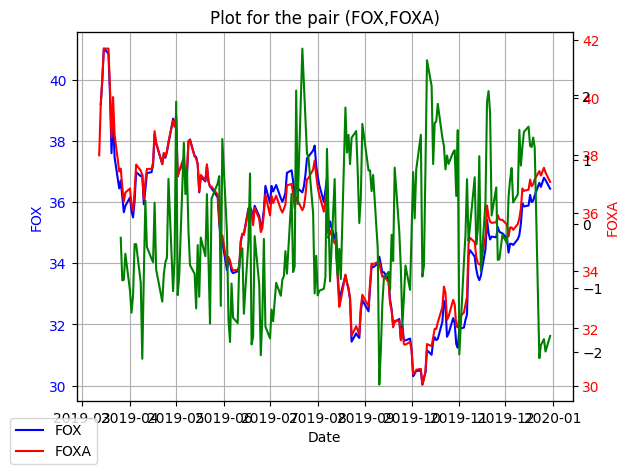

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

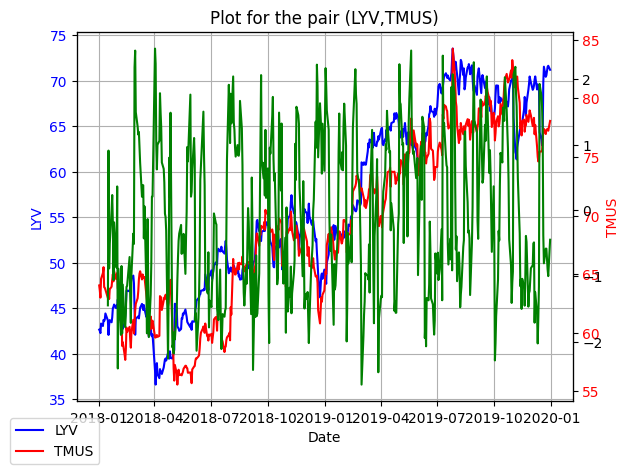

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

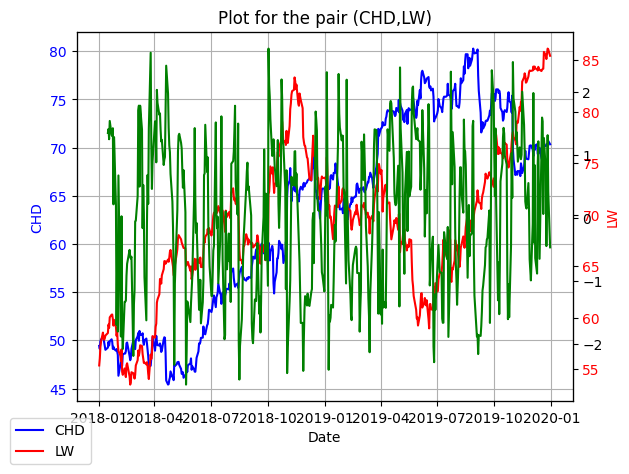

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

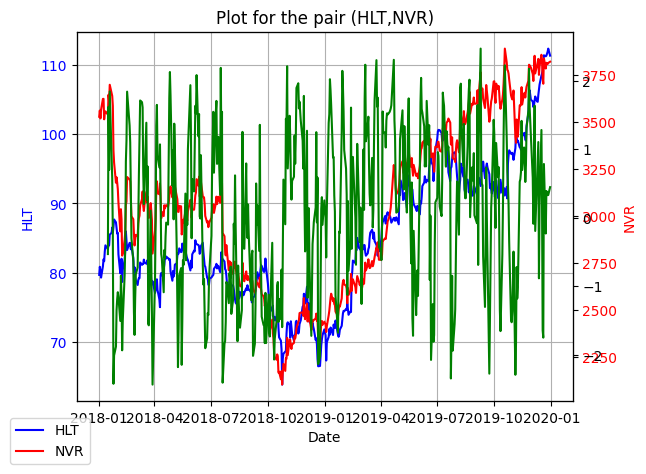

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['mean'] = exemple['Delta_norm'].mean()
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['upper_bond'] = z2
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/2587677383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Figure size 1500x2000 with 0 Axes>

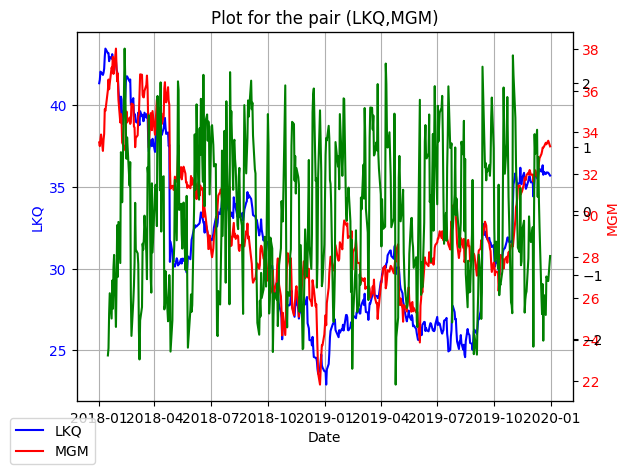

In [62]:
for key,exemple in dataframes_dictionnary_raw.items():

    exemple['Delta_norm']
    exemple['mean'] = exemple['Delta_norm'].mean()
    z2 = exemple['Delta_norm'].mean() + 1.8* exemple['Delta_norm'].std()
    z3 = exemple['Delta_norm'].mean() - 1.8 * exemple['Delta_norm'].std()
    exemple['upper_bond'] = z2
    exemple['lower_bond'] = z3
    exemple['a'] = (exemple['Delta_norm'] > exemple['upper_bond']) *1
    exemple['b'] = (exemple['Delta_norm'] < exemple['lower_bond']) *1
    exemple[['a','b']] = exemple[['a','b']] - exemple[['a','b']].shift(1) *(1)
    exemple['entry_points'] = exemple['a'] + exemple['b']
    
    plt.figure(figsize=(15, 20))
    #exemple = exemple.iloc[:50]
    x = exemple.index
    y1 = exemple[key[0]]
    y2 = exemple[key[1]]
    y3 = exemple['Delta_norm']
    fig, ax1 = plt.subplots()

# Plot on the first y-axis
    ax1.plot(x, y1, 'b-', label=f'{key[0]}')
    ax1.set_xlabel('Date')  # Common x-axis label
    ax1.set_ylabel(f'{key[0]}', color='b')  # First y-axis label
    ax1.tick_params(axis='y', labelcolor='b')  # Match tick labels with axis color

# Create the second y-axis
    ax2 = ax1.twinx()  # This shares the same x-axis
    ax2.plot(x, y2, 'r-', label=f'{key[1]}')
    ax2.set_ylabel(f'{key[1]}', color='r')  # Second y-axis label
    ax2.tick_params(axis='y', labelcolor='r')  # Match tick labels with axis color

    ax3 = ax1.twinx()
    ax3.plot(x,y3,'g-')

# Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.01, 0.09))

# Add a grid (optional)
    ax1.grid(True)

# Show the plot
    plt.title(f"Plot for the pair ({key[0]},{key[1]})")
    plt.show()

In [29]:
exemple['a'] = (exemple['Delta_norm'] > exemple['upper_bond']) *1
exemple['b'] = (exemple['Delta_norm'] < exemple['lower_bond']) *1

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/3926409579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['a'] = (exemple['Delta_norm'] > exemple['upper_bond']) *1
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/3926409579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['b'] = (exemple['Delta_norm'] < exemple['lower_bond']) *1


In [30]:
exemple[['a','b']] = exemple[['a','b']] - exemple[['a','b']].shift(1) *(1)
exemple['entry_points'] = exemple['a'] + exemple['b']
exemple.drop(['a','b'], axis = 1)

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/1735854968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple[['a','b']] = exemple[['a','b']] - exemple[['a','b']].shift(1) *(1)
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_49677/1735854968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemple['entry_points'] = exemple['a'] + exemple['b']


Ticker           CPRT         TDG  Delta_norm      mean  upper_bond  \
Date                                                                  
2018-01-02  10.900000  275.109985         NaN  0.287281      1.4604   
2018-01-03  10.847500  270.220001         NaN  0.287281      1.4604   
2018-01-04  10.935000  272.839996         NaN  0.287281      1.4604   
2018-01-05  10.882500  274.910004         NaN  0.287281      1.4604   
2018-01-08  10.887500  276.019989         NaN  0.287281      1.4604   
...               ...         ...         ...       ...         ...   
2019-12-23  22.467501  593.030029    1.893304  0.287281      1.4604   
2019-12-24  22.727501  592.630005    1.406051  0.287281      1.4604   
2019-12-26  22.754999  597.780029    1.457314  0.287281      1.4604   
2019-12-27  22.705000  563.979980   -1.351469  0.287281      1.4604   
2019-12-30  22.715000  562.010010   -1.260483  0.287281      1.4604   

Ticker      lower_bond  entry_points  
Date                                  
2018-01-02   -0.885838           NaN  
2018-01-03   -0.885838           0.0  
2018-01-04   -0.885838           0.0  
2018-01-05   -0.885838           0.0  
2018-01-08   -0.885838           0.0  
...                ...           ...  
2019-12-23   -0.885838           0.0  
2019-12-24   -0.885838          -1.0  
2019-12-26   -0.885838           0.0  
2019-12-27   -0.885838           1.0  
2019-12-30   -0.885838           0.0  

[502 rows x 7 columns]

In [31]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly.express as px


In [33]:
exemple.reset_index(inplace=True)

In [38]:
exemple.set_index('Date', inplace = True)


KeyError: "None of ['Date'] are in the columns"

In [39]:
exemple

Ticker           CPRT         TDG  Delta_norm      mean  upper_bond  \
Date                                                                  
2018-01-02  10.900000  275.109985         NaN  0.287281      1.4604   
2018-01-03  10.847500  270.220001         NaN  0.287281      1.4604   
2018-01-04  10.935000  272.839996         NaN  0.287281      1.4604   
2018-01-05  10.882500  274.910004         NaN  0.287281      1.4604   
2018-01-08  10.887500  276.019989         NaN  0.287281      1.4604   
...               ...         ...         ...       ...         ...   
2019-12-23  22.467501  593.030029    1.893304  0.287281      1.4604   
2019-12-24  22.727501  592.630005    1.406051  0.287281      1.4604   
2019-12-26  22.754999  597.780029    1.457314  0.287281      1.4604   
2019-12-27  22.705000  563.979980   -1.351469  0.287281      1.4604   
2019-12-30  22.715000  562.010010   -1.260483  0.287281      1.4604   

Ticker      lower_bond    a    b  entry_points  
Date                                            
2018-01-02   -0.885838  NaN  NaN           NaN  
2018-01-03   -0.885838  0.0  0.0           0.0  
2018-01-04   -0.885838  0.0  0.0           0.0  
2018-01-05   -0.885838  0.0  0.0           0.0  
2018-01-08   -0.885838  0.0  0.0           0.0  
...                ...  ...  ...           ...  
2019-12-23   -0.885838  0.0  0.0           0.0  
2019-12-24   -0.885838 -1.0  0.0          -1.0  
2019-12-26   -0.885838  0.0  0.0           0.0  
2019-12-27   -0.885838  0.0  1.0           1.0  
2019-12-30   -0.885838  0.0  0.0           0.0  

[502 rows x 9 columns]

In [36]:
df = exemple

# Reshape the data for plotting
df_melted = df.melt(id_vars=['Date', "a", "b"], value_vars=["Delta_norm", "lower_bond", "upper_bond",'a'], 
                    var_name="Variable", value_name="Value")

# Create an interactive Plotly line chart
fig = px.line(df_melted, 
              x="Date", 
              y="Value", 
              color="Variable", 
              line_group="Variable",
              title="Interactive Zoomable Chart",
              markers=True)

# Update layout for zoomable x-axis
fig.update_layout(xaxis=dict(title="Date", rangeslider=dict(visible=True)), 
                  yaxis=dict(title="Value"), 
                  hovermode="x unified")

# Show the chart
fig.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Date']"

In [53]:

y1 = values['Delta_norm']
y2 = values['Delta_norm'].mean() + 2 * values['Delta_norm'].std()
y3 = values['Delta_norm'].mean() - 2*values['Delta_norm'].std()
values['a'] = [1 if values['Delta_norm'] > y2 else 0] 
values['b'] = [-1 if values['Delta_norm'] < y3 else 0 ]
values['Entry_points'] = values['a'] + values['b']
values.drop([['a','b']], inplace = True)
fig, ax = plt.subplots()

ax.plot(values.index,y1)
ax.plot(values.index,y2)
ax.plot(values.index,y3)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
def ornstein_uhlenbeck(
    X0=0.0,       # Initial value
    theta=0.0,    # Long-term mean
    kappa=0.3,    # Speed of mean reversion
    sigma=0.3,    # Volatility
    T=1.0,        # Total time
    N=1000,       # Number of steps
    seed=None     # Random seed for reproducibility
):
    """
    Simulate an Ornstein-Uhlenbeck process with X as a list.

    Parameters:
    - X0 (float): Initial value of the process.
    - theta (float): Long-term mean.
    - kappa (float): Speed of mean reversion.
    - sigma (float): Volatility parameter.
    - T (float): Total time to simulate.
    - N (int): Number of time steps.
    - seed (int, optional): Seed for the random number generator.

    Returns:
    - t (numpy.ndarray): Array of time points.
    - X (list of float): Simulated Ornstein-Uhlenbeck process as a list.
    """
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / N
    t = np.linspace(0, T, N+1)
    X = [X0]  # Initialize X as a list with the initial value
    
    # Generate all random shocks at once for efficiency
    dW = np.random.normal(scale=np.sqrt(dt), size=N)
    
    # Simulate the process
    for i in range(N):
        X_prev = X[-1]
        X_new = X_prev + kappa * (theta - X_prev) * dt + sigma * dW[i]
        X.append(X_new)
    
    return t, X

In [52]:
t,X =ornstein_uhlenbeck()

In [53]:
mean = X.mean()
std = X.std()

AttributeError: 'list' object has no attribute 'mean'

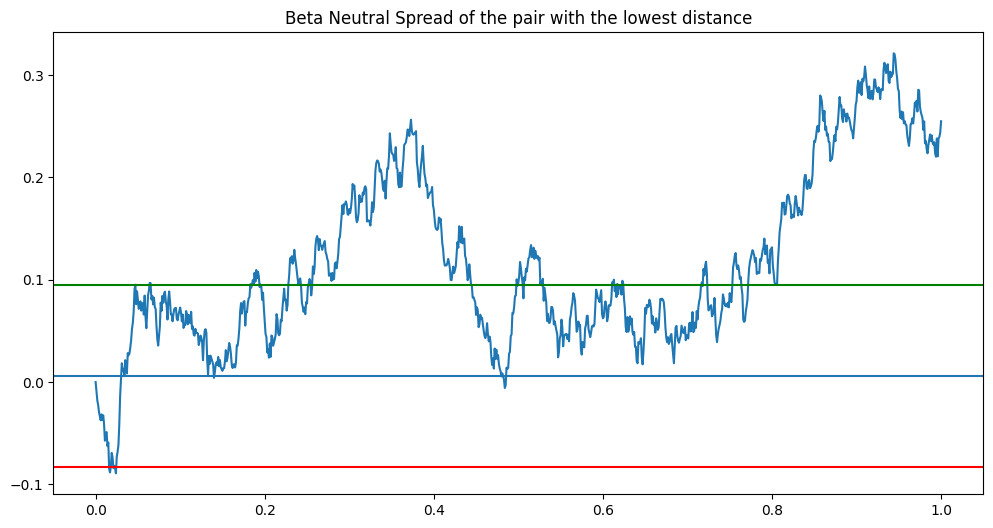

In [83]:
plt.figure(figsize=(12,6))
plt.plot(t,X)
plt.axhline(mean +1.2*std, color='green')
plt.axhline(mean-1.2*std, color='red')
plt.axhline(mean)
plt.title('Beta Neutral Spread of the pair with the lowest distance')
plt.show()

In [84]:
entry_points = ((X>mean+1.2*std) ^ (X<mean -1.2*std))*1

In [85]:
df_test = pd.DataFrame([t,X,entry_points])
df_test =df_test.T

In [86]:
df_test['3'] = df_test[2].shift(1)

In [87]:
df_test['4'] = (df_test[2]!=df_test['3'])*1

In [109]:
df_test['4'][0] =0
df_test['5']=df_test['4'].cumsum()
df_test['6'] = (df_test['5']!=df_test['5'].shift(1))*df_test['5']

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_62059/3806714835.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_test['4'][0] =0
/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_62059/3806714835.py:1: SettingWithC

In [110]:
df_test['6']

0       0
1       0
2       0
3       0
4       0
       ..
996     0
997     0
998     0
999     0
1000    0
Name: 6, Length: 1001, dtype: int64

In [121]:
df_test['7'] = df_test['6'].apply(
    lambda i: np.nan if i == 0 else ('green' if i % 2 == 1 else 'red')
)

In [128]:
df_test

0         1    2    3  4   5  6    7
0     0.000  0.000000  0.0  NaN  0   0  0  NaN
1     0.001 -0.008495  0.0  0.0  0   0  0  NaN
2     0.002 -0.017955  0.0  0.0  0   0  0  NaN
3     0.003 -0.022502  0.0  0.0  0   0  0  NaN
4     0.004 -0.029460  0.0  0.0  0   0  0  NaN
...     ...       ...  ...  ... ..  .. ..  ...
996   0.996  0.220669  1.0  1.0  0  45  0  NaN
997   0.997  0.238001  1.0  1.0  0  45  0  NaN
998   0.998  0.239851  1.0  1.0  0  45  0  NaN
999   0.999  0.243885  1.0  1.0  0  45  0  NaN
1000  1.000  0.254992  1.0  1.0  0  45  0  NaN

[1001 rows x 8 columns]

In [124]:
marker_map = {'green': '^', 'red': 'v'}
color_map = {'green': 'green', 'red': 'red'}

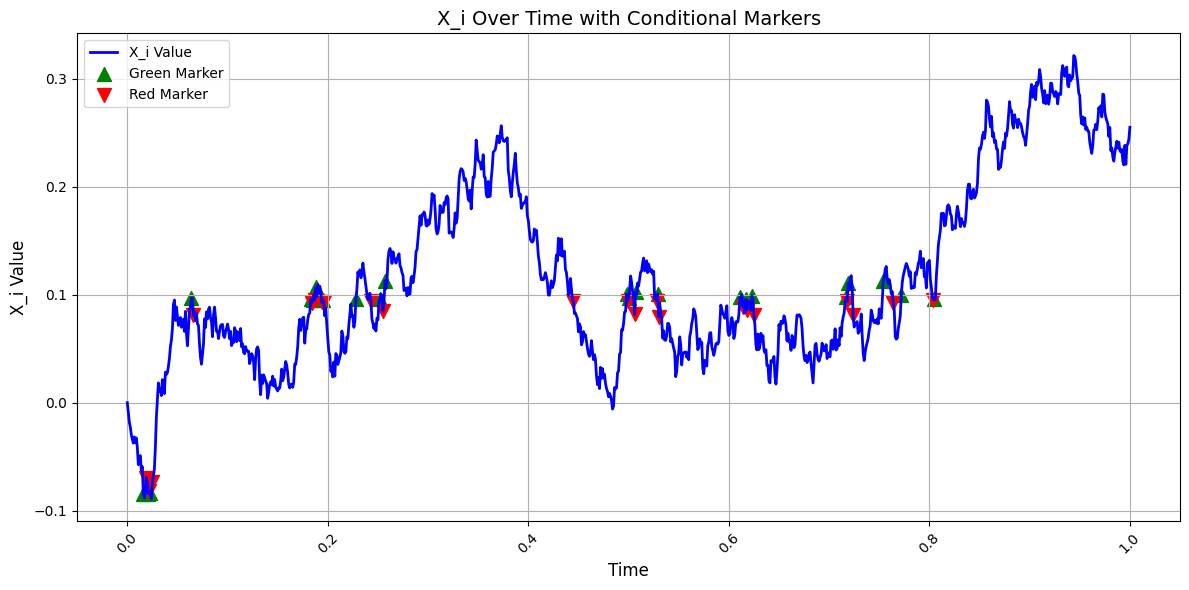

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot X_i vs time as a line
ax.plot(df_test[0], df_test[1], label='X_i Value', color='blue', linewidth=2)

# Plot upward triangles for 'green'
green_points = df_test[df_test['7'] == 'green']
ax.scatter(
    green_points[0],
    green_points[1],
    marker=marker_map['green'],
    color=color_map['green'],
    s=100,  # Marker size
    label='Green Marker'
)

# Plot downward triangles for 'red'
red_points = df_test[df_test['7'] == 'red']
ax.scatter(
    red_points[0],
    red_points[1],
    marker=marker_map['red'],
    color=color_map['red'],
    s=100,  # Marker size
    label='Red Marker'
)

# Customize the plot
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('X_i Value', fontsize=12)
ax.set_title('X_i Over Time with Conditional Markers', fontsize=14)
ax.legend()
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()